In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import Resnet50
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.losses import MeanSquaredError


In [3]:
data_dir = '/content/drive/MyDrive/utkface_aligned_cropped/UTKFace'
if data_dir is None:
  print("directory is empty")
else:
  print("Loaded")

Loaded


In [4]:
img_size = (64,64 )

images = []
labels = []

for filename in os.listdir(data_dir):
    if filename.endswith('.jpg'):
        label = int(filename.split('_')[1])

        img_path = os.path.join(data_dir, filename)
        img = cv.imread(img_path)
        img = cv.resize(img, img_size)

        images.append(img)
        labels.append(label)

In [5]:
images = np.array(images) / 255.0
labels = np.array(labels)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(images,
                                                  labels,
                                                  test_size=0.2)

train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   zoom_range=0.2)

train_generator = train_datagen.flow(X_train,
                                     y_train,
                                     batch_size=32)


In [7]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Pooling layer to reduce dimensions
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Sigmoid for binary classification

model = Model(inputs=base_model.input, outputs=predictions)

In [9]:
X_train.shape

(18966, 64, 64, 3)

In [10]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,6

 Total params: 15,108,929 (57.64 MB)

 Trainable params: 394,241 (1.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [11]:
history = model.fit(
    train_generator,
    validation_data=(X_val, y_val),
    epochs=20
    )

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


593/593 ━━━━━━━━━━━━━━━━━━━━ 54s 77ms/step - accuracy: 0.6697 - loss: 0.6094 - val_accuracy: 0.7484 - val_loss: 0.4881
Epoch 2/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 68s 62ms/step - accuracy: 0.7629 - loss: 0.4857 - val_accuracy: 0.8020 - val_loss: 0.4246
Epoch 3/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 36s 60ms/step - accuracy: 0.7763 - loss: 0.4643 - val_accuracy: 0.8026 - val_loss: 0.4127
Epoch 4/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 38s 63ms/step - accuracy: 0.7854 - loss: 0.4514 - val_accuracy: 0.8176 - val_loss: 0.3955
Epoch 5/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 35s 59ms/step - accuracy: 0.7919 - loss: 0.4339 - val_accuracy: 0.8224 - val_loss: 0.3897
Epoch 6/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 36s 61ms/step - accuracy: 0.8021 - loss: 0.4294 - val_accuracy: 0.8283 - val_loss: 0.3803
Epoch 7/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.8045 - loss: 0.4208 - val_accuracy: 0.8256 - val_loss: 0.3835
Epoch 8/20
593/593 ━━━━━━━━━━━━━━━━━━━━ 37s 62ms/step - accuracy: 0.8078 - loss: 0.4121 - val_accurac

In [12]:
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy is {accuracy} Test loss is {loss}")


149/149 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8397 - loss: 0.3490
Test accuracy is 0.8371995091438293 Test loss is 0.35749056935310364


In [13]:
def predict_gender(img_path):
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    img = cv.resize(img, img_size) / 255.0

    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)

    predicted_gender = "Female" if prediction >= 0.5 else "Male"
    print("Predicted Gender:", predicted_gender, prediction)

    plt.imshow(img[0])
    plt.title(f"Predicted Gender: {predicted_gender}")
    plt.axis('off')
    plt.show()

    return predicted_gender

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
model.save(os.path.join('/content/drive/My Drive/','gender_classification.h5'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Gender: Male [[0.2692045]]


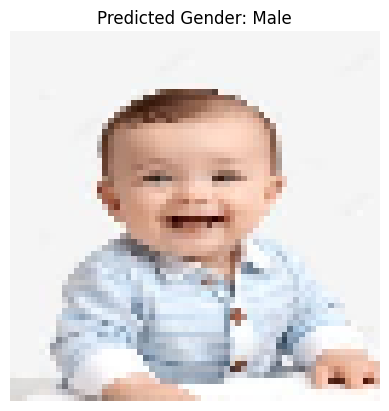

'Male'

In [14]:
predict_gender('/content/drive/MyDrive/boy_2_test.jpg')